In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
d=pd.read_csv("iris.csv")
d.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
#Converting categorical to numerical so we can use knn
d['variety']=d['variety'].map({'Setosa':0,'Versicolor':1,'Virginica':2})
d.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#Choosing the features as x and the target as y
x=d[['sepal.length','sepal.width','petal.length','petal.width']]
y=d['variety']
d.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [6]:
knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier

KNeighborsClassifier(n_neighbors=20)

In [7]:
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.9666666666666667


In [8]:
n_neighbors=30
scores=[]

In [9]:
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.97
Accuracy for k= 2 is: 0.97
Accuracy for k= 3 is: 0.97
Accuracy for k= 4 is: 0.93
Accuracy for k= 5 is: 0.93
Accuracy for k= 6 is: 0.93
Accuracy for k= 7 is: 1.0
Accuracy for k= 8 is: 0.97
Accuracy for k= 9 is: 0.97
Accuracy for k= 10 is: 0.97
Accuracy for k= 11 is: 1.0
Accuracy for k= 12 is: 0.97
Accuracy for k= 13 is: 1.0
Accuracy for k= 14 is: 0.97
Accuracy for k= 15 is: 0.97
Accuracy for k= 16 is: 0.97
Accuracy for k= 17 is: 0.97
Accuracy for k= 18 is: 0.97
Accuracy for k= 19 is: 0.97
Accuracy for k= 20 is: 0.97
Accuracy for k= 21 is: 1.0
Accuracy for k= 22 is: 1.0
Accuracy for k= 23 is: 1.0
Accuracy for k= 24 is: 1.0
Accuracy for k= 25 is: 1.0
Accuracy for k= 26 is: 1.0
Accuracy for k= 27 is: 1.0
Accuracy for k= 28 is: 1.0
Accuracy for k= 29 is: 1.0


Text(0, 0.5, 'Testing Accuracy')

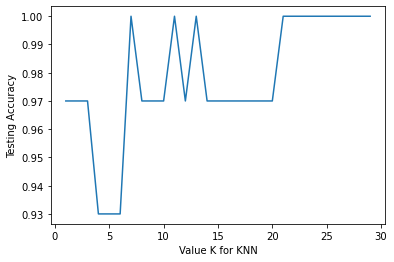

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [11]:
import csv
import random
import math
import operator
import numpy as np
import pandas as pd
import seaborn as sns

# Handle Data

Open the dataset from CSV 

In [12]:
def loadDataset(filename, split, trainingSet=[] , testSet=[]): 
    
    with open(filename, 'r') as csvfile:
        
        lines = csv.reader(csvfile)
        
        dataset = list(lines)
        
        for x in range(len(dataset)-1):
            
            for y in range(4):
                
                dataset[x][y]
                
            if random.random() < split:
                
                trainingSet.append(dataset[x])
                
            else:
                
                   testSet.append(dataset[x])

In [13]:
trainingSet=[]

testSet=[]

loadDataset("iris.csv", 0.66, trainingSet, testSet)

print ('Train: ' + repr(len(trainingSet)))

print ('Test: ' + repr(len(testSet)) )

Train: 98
Test: 52


# Similarity

In [14]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [15]:
data1 = [2, 2, 2, 'a']

data2 = [4, 4, 4, 'b']

distance = euclideanDistance(data1, data2, 3)

print ('Distance: ' + repr(distance))


Distance: 3.4641016151377544


# Neighbors

In [16]:
def getNeighbors(trainingSet, testInstance, k):

    distances = []

    length = len(testInstance)-1

    for x in range(len(trainingSet)):

            dist = euclideanDistance(testInstance, trainingSet[x], length)

            distances.append((trainingSet[x], dist))

            distances.sort(key=operator.itemgetter(1))

            neighbors = []

    for x in range(k):

            neighbors.append(distances[x][0])

    return neighbors


In [17]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]

testInstance = [5, 5, 5]

k = 1

neighbors = getNeighbors(trainSet, testInstance,1)

print(neighbors)

[[4, 4, 4, 'b']]


# Response

In [18]:
def getResponse(neighbors):
    classVotes={}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [19]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)

print(response)

a


# Accuracy

In [20]:
def getAccuracy(test, pred):
    correct = 0
    for i in range(len(test)):
        if test[i][-1]==pred[i]:
            correct += 1 
    return 100.0*(correct/float(len(test)))

In [21]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)

print(accuracy)

66.66666666666666


# Main

In [22]:
def main():
    k=1
    trainingSet=[] 
    testSet=[]
    predictions=[]
    loadDataset('iris.csv',0.66,trainingSet,testSet)
    for x in range(len(testSet)):
        neighbors=getNeighbors(trainingSet,testSet[x],k)
        predictions.append(getResponse(neighbors))
    print("the accuracy of ",k,"is:",getAccuracy(testSet,predictions))

# Another distance metric

In [23]:
def manhattan(instance1,instance2,length):
    s=0
    for i in range(length):
        s=s+abs(instance1[i] - instance2[i])
    return s